## fig5_ellipses

In [3]:
#import time, datetime
import numpy as np
#from numpy import zeros, sqrt, pi, vectorize
from numpy.linalg import pinv, inv
#from multiprocessing import Process, Queue
#import matplotlib
#matplotlib.use('Qt4Agg')
import matplotlib.pyplot as plt
%matplotlib inline
#from error_analysis_class import *
#from noshellavg import *

import sys, os
sys.path.append('../src/')
sys.path.append('/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_working/')
from discrete import *

%load_ext autoreload
%autoreload 2

In [4]:
import fitsio
from plot_chain import plot_triple

In [5]:
import numpy as np
from chainconsumer import ChainConsumer

In [54]:
keep = [0,1,2]
covtot = data['cov_params_tot'][:keep[-1]+1, :keep[-1]+1]
covtot.shape

(3, 3)

In [102]:

def plotting_ellipse(data, keep = [0,1,2]):

    covtot = data['cov_params_tot_direct'][:keep[-1]+1, :keep[-1]+1]
    covdiff = data['cov_params_diff_direct'][:keep[-1]+1, :keep[-1]+1]
    covp = data['cov_params_p_direct'][:keep[-1]+1, :keep[-1]+1]
    covxi = data['cov_params_Xi_direct'][:keep[-1]+1, :keep[-1]+1]
    mean = [2, 0.74, 3.5, 1./0.0003][:keep[-1]+1]

    datap = np.random.multivariate_normal(mean, covp, size = 500000 )
    dataxi = np.random.multivariate_normal(mean, covxi, size = 500000 )
    datatot = np.random.multivariate_normal(mean, covtot, size = 500000 )
    datadiff = np.random.multivariate_normal(mean, covdiff, size = 500000 )

    chains = [datap, dataxi, datatot, datadiff]
    params_names = ['b', 'f', 's', '1/n'][:keep[-1]+1]
    params_names_list = [ params_names, params_names, params_names, params_names ] 
    params_fid = [2.0, 0.74, 3.5, 0.0003]
    figname = 'test.png'
    chain_names = ['p', 'xi', 'com', 'diff']
    colors = ['b', 'r', 'g', 'purple']

    c = plot_triple(chains, params_names_list, params_fid, figname,
        keep=keep, extents = None, chain_names=chain_names, plot_hists=False,
        blind= None, shade_alpha = [0,0,0,0], figsize=(13,13), summary=None, sigmas=[1],
        shade = None, colors = colors, linestyles = ['-', '-', '-', '--'], linewidths=[2,2,2,2], kde = None, 
        legend_location=None, flip=False )

plot save to  test.png
plot save to  test.png


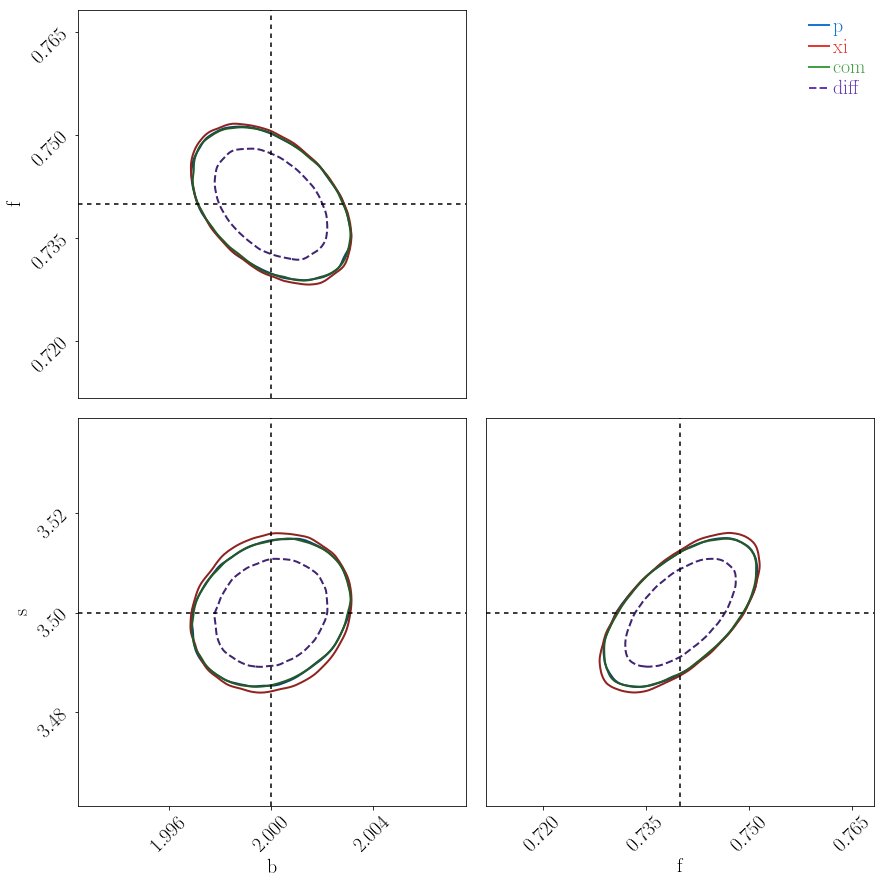

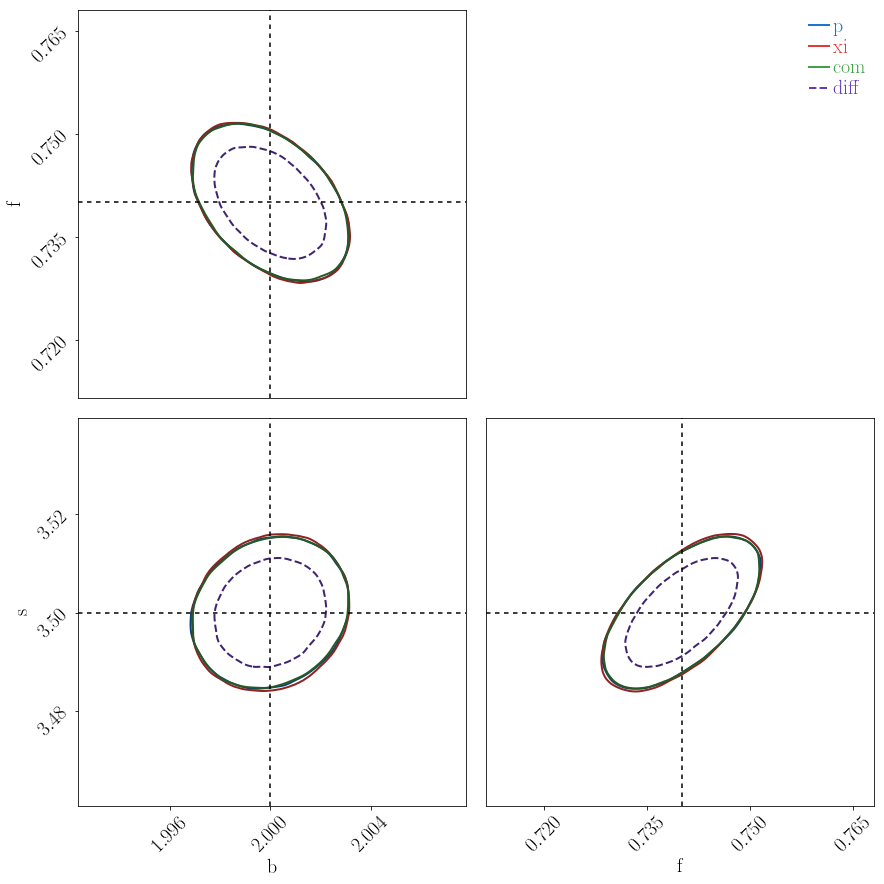

In [103]:
data = fitsio.read('../output_full//output_bfs.fits')
plotting_ellipse(data)
data = fitsio.read('../output_full//output_nn.fits')
plotting_ellipse(data, keep=[0,1,2])

plot save to  test.png
plot save to  test.png


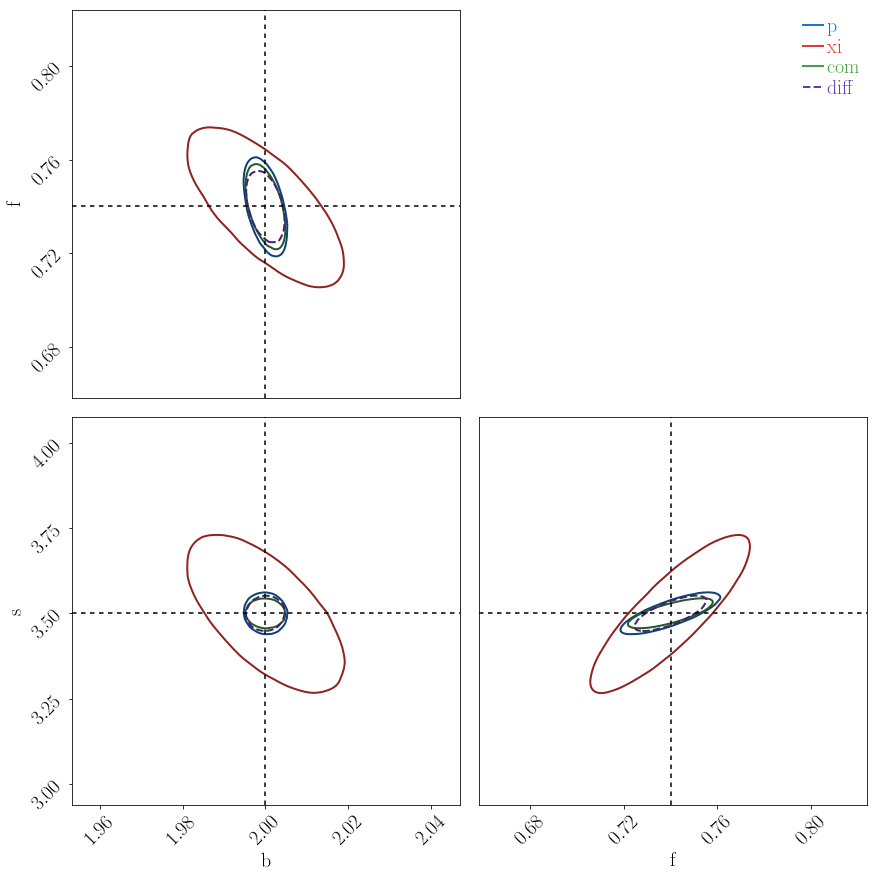

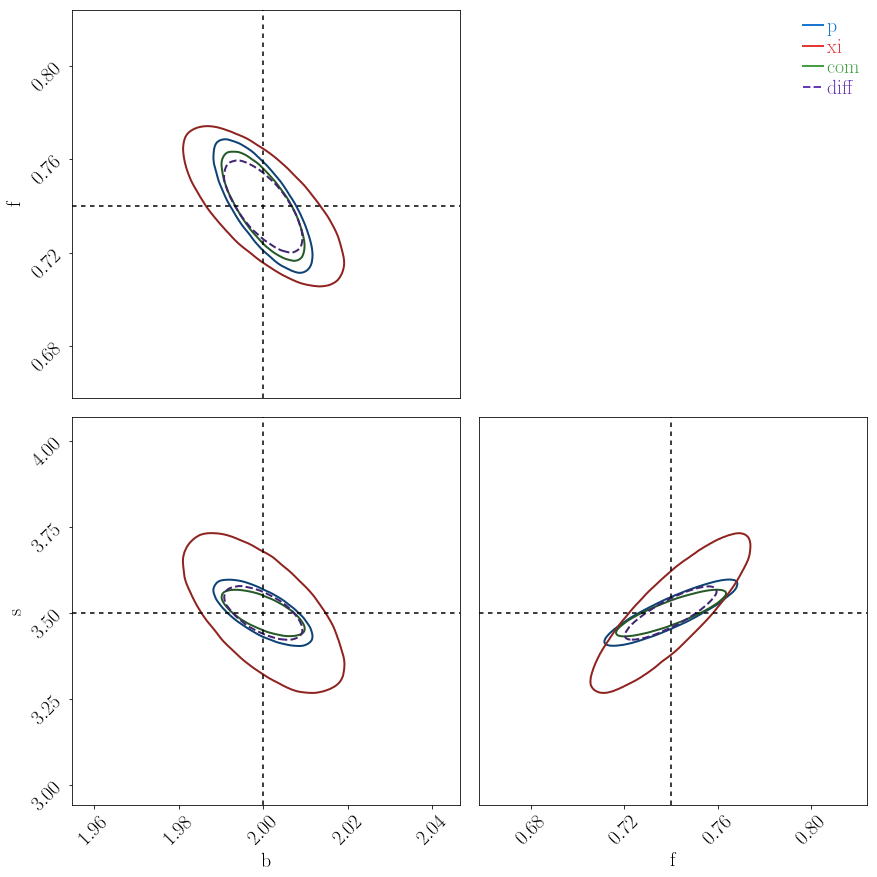

In [104]:
data = fitsio.read('../output_Grieb_Sanchez//output_bfs.fits')
plotting_ellipse(data)
data = fitsio.read('../output_Grieb_Sanchez//output_nn.fits')
plotting_ellipse(data)

plot save to  test.png
plot save to  test.png


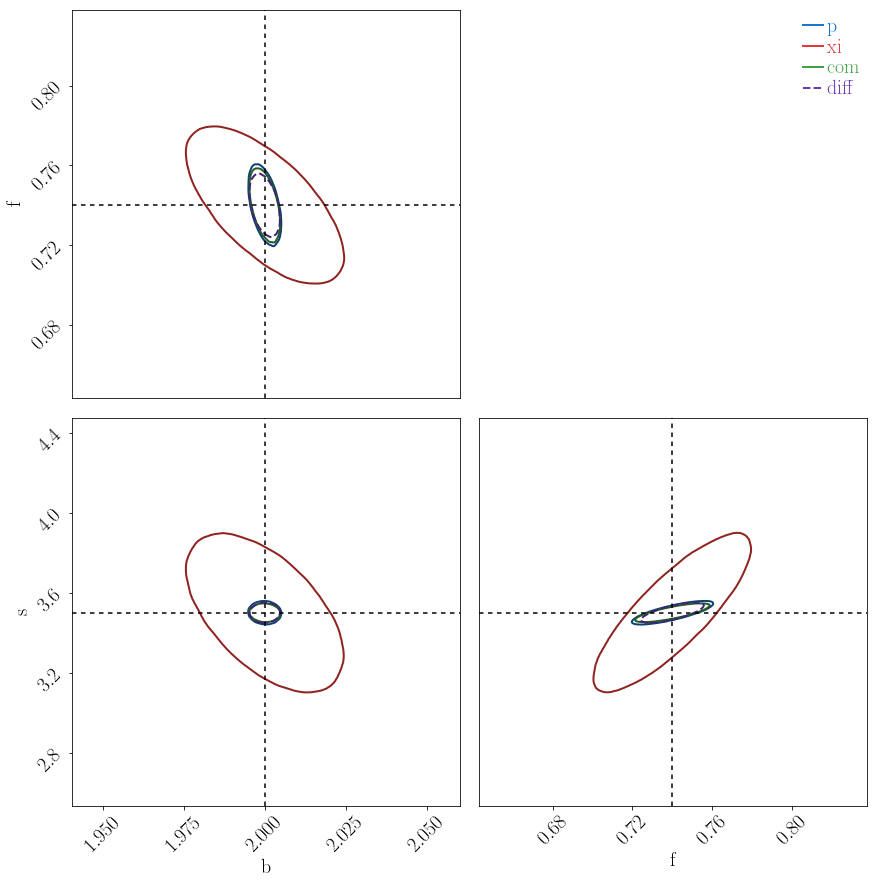

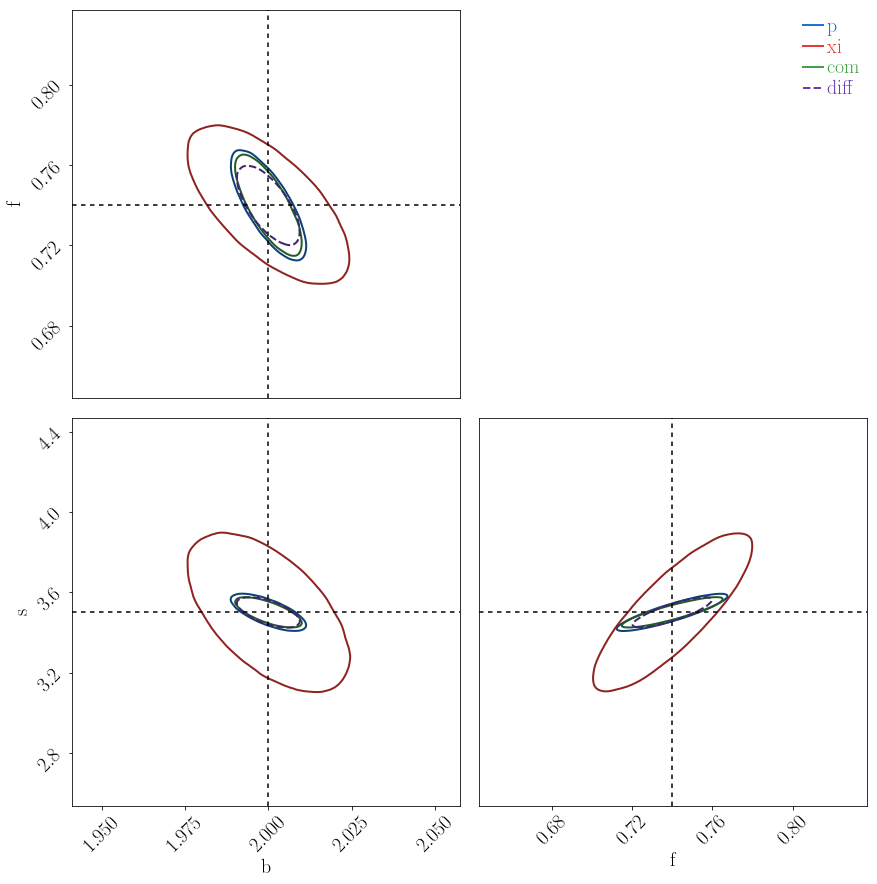

In [105]:
data = fitsio.read('../output_Grieb_Satpathy///output_bfs.fits')
plotting_ellipse(data)

data = fitsio.read('../output_Grieb_Satpathy///output_nn.fits')
plotting_ellipse(data)

In [106]:
data = fitsio.read('../output_testscales_Sanchez/output_bfs.fits')
plotting_ellipse(data)
data = fitsio.read('../output_testscales_Sanchez/output_nn.fits')
plotting_ellipse(data)

IOError: FITSIO status = 104: could not open the named file
failed to find or open the following file: (ffopen)
../output_testscales_Sanchez/output_bfs.fits


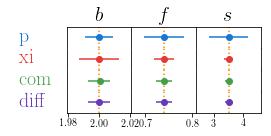

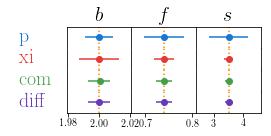

In [134]:
c.configure_truth(ls=":", color="#FB8C00")
c.plotter.plot_summary(errorbar=True, truth=params_fid)

## Initial settings 

In [2]:
def getbfEllipses(RSDPower, kmin = 0.01, kmax = 5, reid=None, base = 'r'):    
    
    RMAX = RSDPower.RMAX
    RMIN = RSDPower.RMIN
    
    rcut_max = get_closest_index_in_data( RMAX, RSDPower.rmax )
    rcut_min = get_closest_index_in_data( RMIN, RSDPower.rmin )
    kcut_min = get_closest_index_in_data( kmin, RSDPower.kmin_y )
    kcut_max = get_closest_index_in_data( kmax, RSDPower.kmax_y )

    file = 'matterpower_z_0.55.dat'  # from camb (z=0.55)
    RSDPower.MatterPower(file = file)
    # power spectrum multipoles l = 0,2,4
    RSDPower.multipole_P_band_all()

    # derivative dXi/dp
    RSDPower.derivative_Xi_band_all()

    # derivative dXidb, s, f
    RSDPower.derivative_bfs_all()
    RSDPower.derivative_P_bfs_all()

    # P covariance matrix ( nine submatrices C_ll' )
    RSDPower.RSDband_covariance_PP_all()

    # Xi covariance matrix ( nine submatrices C_ll' )
    RSDPower.covariance_Xi_all()
    RSDPower.covariance_PXi_All()
    
    
    
    matricesXi = [RSDPower.covariance00[rcut_max:rcut_min+1,rcut_max:rcut_min+1],\
              RSDPower.covariance02[rcut_max:rcut_min+1,rcut_max:rcut_min+1],\
              RSDPower.covariance04[rcut_max:rcut_min+1,rcut_max:rcut_min+1],\
              np.transpose(RSDPower.covariance02[rcut_max:rcut_min+1,rcut_max:rcut_min+1]),\
              RSDPower.covariance22[rcut_max:rcut_min+1,rcut_max:rcut_min+1],\
              RSDPower.covariance24[rcut_max:rcut_min+1,rcut_max:rcut_min+1],\
              np.transpose(RSDPower.covariance04[rcut_max:rcut_min+1,rcut_max:rcut_min+1]),\
              np.transpose(RSDPower.covariance24[rcut_max:rcut_min+1,rcut_max:rcut_min+1]),\
              RSDPower.covariance44[rcut_max:rcut_min+1,rcut_max:rcut_min+1]]

    matricesPP_all = [RSDPower.covariance_PP00,RSDPower.covariance_PP02,\
                    RSDPower.covariance_PP04,RSDPower.covariance_PP02,\
                    RSDPower.covariance_PP22,RSDPower.covariance_PP24,\
                    RSDPower.covariance_PP04,RSDPower.covariance_PP24,\
                    RSDPower.covariance_PP44]

    matricesPP = [RSDPower.covariance_PP00[kcut_min:kcut_max+1,kcut_min:kcut_max+1],
                RSDPower.covariance_PP02[kcut_min:kcut_max+1,kcut_min:kcut_max+1],
                RSDPower.covariance_PP04[kcut_min:kcut_max+1,kcut_min:kcut_max+1],
                RSDPower.covariance_PP02[kcut_min:kcut_max+1,kcut_min:kcut_max+1],
                RSDPower.covariance_PP22[kcut_min:kcut_max+1,kcut_min:kcut_max+1],
                RSDPower.covariance_PP24[kcut_min:kcut_max+1,kcut_min:kcut_max+1],
                RSDPower.covariance_PP04[kcut_min:kcut_max+1,kcut_min:kcut_max+1],
                RSDPower.covariance_PP24[kcut_min:kcut_max+1,kcut_min:kcut_max+1],
                RSDPower.covariance_PP44[kcut_min:kcut_max+1,kcut_min:kcut_max+1]]

    matricesPXi = [RSDPower.covariance_PXi00[kcut_min:kcut_max+1,rcut_max:rcut_min+1],\
                 RSDPower.covariance_PXi02[kcut_min:kcut_max+1,rcut_max:rcut_min+1],\
                 RSDPower.covariance_PXi04[kcut_min:kcut_max+1,rcut_max:rcut_min+1],\
                 RSDPower.covariance_PXi20[kcut_min:kcut_max+1,rcut_max:rcut_min+1],\
                 RSDPower.covariance_PXi22[kcut_min:kcut_max+1,rcut_max:rcut_min+1],\
                 RSDPower.covariance_PXi24[kcut_min:kcut_max+1,rcut_max:rcut_min+1],\
                 RSDPower.covariance_PXi40[kcut_min:kcut_max+1,rcut_max:rcut_min+1],\
                 RSDPower.covariance_PXi42[kcut_min:kcut_max+1,rcut_max:rcut_min+1],\
                 RSDPower.covariance_PXi44[kcut_min:kcut_max+1,rcut_max:rcut_min+1]]


    
    l1 = RSDPower.kcenter_y.size
    l2 = rcut_min+1 - rcut_max
    l3 = kcut_max+1 - kcut_min

    
    # combining covariances
    C_matrix3PP_all = CombineCovariance3(l1, matricesPP_all)
    C_matrix3PP = CombineCovariance3(l3, matricesPP)
    C_matrix3Xi = CombineCovariance3(l2, matricesXi)

    #C_matrix3PXi = np.zeros((C_matrix3PXi.shape))
    C_matrix3PXi, C_matrix3XiP = CombineCrossCovariance3(l3, l2, matricesPXi, transpose = True)
    C_matrix3_tot = np.concatenate((np.concatenate((C_matrix3PP, C_matrix3PXi), axis=1),\
                                    np.concatenate((C_matrix3PXi.T, C_matrix3Xi), axis=1)), axis = 0)


    
    # inverting matrices
    from test_SNR import blockwiseInversion
    FisherP_all = inv(C_matrix3PP_all)
    FisherP = inv(C_matrix3PP)
    FisherXi = blockwiseInversion( C_matrix3Xi, rcut_min+1-rcut_max )
    Fisher3_tot = blockwiseInversion( C_matrix3_tot, 3 * (kcut_max+1-kcut_min) )


    # derivatives
    derivative_P0 = np.identity(RSDPower.kcenter_y.size)[:,kcut_min:kcut_max+1]
    Pzeros = np.zeros((derivative_P0.shape))

    derivative_P = np.concatenate((np.concatenate((derivative_P0, Pzeros, Pzeros),axis=1 ),\
                                   np.concatenate((Pzeros, derivative_P0, Pzeros),axis=1 ),\
                                   np.concatenate((Pzeros, Pzeros, derivative_P0),axis=1 )), axis=0)
    Xizeros = np.zeros((RSDPower.dxip0[:,rcut_max:rcut_min+1].shape))
    derivative_correl_avg = np.concatenate(( np.concatenate((RSDPower.dxip0[:,rcut_max:rcut_min+1],Xizeros,Xizeros), axis=1),\
                                            np.concatenate((Xizeros,RSDPower.dxip2[:,rcut_max:rcut_min+1],Xizeros), axis=1),\
                                            np.concatenate((Xizeros,Xizeros,RSDPower.dxip4[:,rcut_max:rcut_min+1]), axis=1)),axis=0 )
    Derivatives = np.concatenate((derivative_P,derivative_correl_avg), axis=1)

    
    
    
    # final bandpower fisher
    
    FisherBand_P = FisherP.copy()
    FisherBand_P_all = FisherP_all.copy()
    FisherBand_Xi = FisherProjection_Fishergiven(derivative_correl_avg, FisherXi)
    FisherBand_tot = FisherProjection_Fishergiven(Derivatives, Fisher3_tot)

    
    
    
    # Derivative vector
    matrices2P_cut = [RSDPower.dPb0[kcut_min:kcut_max+1], RSDPower.dPb2[kcut_min:kcut_max+1],\
                  RSDPower.dPb4[kcut_min:kcut_max+1], RSDPower.dPf0[kcut_min:kcut_max+1],\
                  RSDPower.dPf2[kcut_min:kcut_max+1], RSDPower.dPf4[kcut_min:kcut_max+1],\
                  RSDPower.dPs0[kcut_min:kcut_max+1], RSDPower.dPs2[kcut_min:kcut_max+1],\
                  RSDPower.dPs4[kcut_min:kcut_max+1]]

    matrices2P = [RSDPower.dPb0, RSDPower.dPb2, RSDPower.dPb4,\
                  RSDPower.dPf0, RSDPower.dPf2, RSDPower.dPf4,\
                  RSDPower.dPs0, RSDPower.dPs2, RSDPower.dPs4]

    XP, XP2 = CombineDevXi(l1, matrices2P)
    XP_cut, XP2_cut = CombineDevXi(l3, matrices2P_cut)
    
    
    # parameter Fisher matrices
    FisherPP = np.dot( np.dot( XP_cut, inv(C_matrix3PP)), XP_cut.T)
    FisherXi = np.dot( np.dot( XP, FisherBand_Xi), XP.T)
    Fishertot = np.dot( np.dot( XP, FisherBand_tot), XP.T)

    Cov_PP = inv(FisherPP)[0:2,0:2]
    Cov_Xi = inv(FisherXi)[0:2,0:2]
    Cov_tot = inv(Fishertot)[0:2,0:2]

    
    # add shot noise params
    dPN0 = np.ones(RSDPower.kcenter_y.size)
    dPN1 = np.zeros(RSDPower.kcenter_y.size)
    dPN2 = dPN1.copy()
    XP_N = np.vstack((XP,np.array([dPN0, dPN1, dPN2]).ravel()))
    XP_N_cut = np.vstack((XP_cut, np.array([dPN0[kcut_min:kcut_max+1],\
                                            dPN1[kcut_min:kcut_max+1],\
                                            dPN2[kcut_min:kcut_max+1]]).ravel()))

    FisherPP_N = np.dot( np.dot( XP_N_cut, inv(C_matrix3PP)), XP_N_cut.T)
    FisherXi_N = np.dot( np.dot( XP_N, FisherBand_Xi), XP_N.T)
    Fishertot_N = np.dot( np.dot( XP_N, FisherBand_tot), XP_N.T)

    Cov_PP_N = inv(FisherPP_N)[0:2,0:2]
    Cov_Xi_N = inv(FisherXi_N)[0:2,0:2]
    Cov_tot_N = inv(Fishertot_N)[0:2,0:2]

    
    
    # Cov_bf directly from C_Xi
    #C_matrix3Xi, C_matrix3_tot
    # derivative vector dXi/dparams
    matricesXi = [RSDPower.dXib0[rcut_min:rcut_max+1], RSDPower.dXib2[rcut_max:rcut_min+1],\
              RSDPower.dXib4[rcut_max:rcut_min+1], RSDPower.dXif0[rcut_max:rcut_min+1],\
              RSDPower.dXif2[rcut_max:rcut_min+1], RSDPower.dXif4[rcut_min:rcut_max+1],\
              RSDPower.dXis0[rcut_max:rcut_min+1], RSDPower.dXis2[rcut_max:rcut_min+1],\
              RSDPower.dXis4[rcut_max:rcut_min+1]]
    XXi, XXi2 = CombineDevXi(l2, matricesXi)
    FisherXi_direct = np.dot( np.dot( XXi, inv(C_matrix3Xi)), XXi.T)
    Cov_Xi_direct = inv(FisherXi_direct)[0:2, 0:2]
    
    Derivatives_direct = np.concatenate((XP_cut,XXi), axis=1)
    Fishertot_direct = np.dot( np.dot( Derivatives_direct, inv(C_matrix3_tot)), Derivatives_direct.T)
    Cov_tot_direct = inv(Fishertot_direct)[0:2, 0:2]
    
    
    
    if reid is None : return [Cov_PP, Cov_Xi, Cov_tot, Cov_Xi_direct, Cov_tot_direct, Cov_PP_N, Cov_Xi_N, Cov_tot_N]


    elif reid is True : 
        # to check convergence, reid plot --------------------------    
        from test_SNR import reordering, reorderingVector, blockwise
        re_C_matrix3Xi, _ = reordering( RSDPower, C_matrix3Xi )

        FisherBand_P_all = FisherP_all.copy()
        re_FisherBand_P_all, _ = reordering( RSDPower, FisherBand_P_all)

        # for xi
        Xizeros = np.zeros((RSDPower.dxip0[:, rcut_max:rcut_min+1].shape))
        dxip0 = reorderingVector([RSDPower.dxip0[:, rcut_max:rcut_min+1], Xizeros, Xizeros])
        dxip2 = reorderingVector([Xizeros, RSDPower.dxip2[:, rcut_max:rcut_min+1], Xizeros])
        dxip4 = reorderingVector([Xizeros, Xizeros, RSDPower.dxip4[:, rcut_max:rcut_min+1]])
        dxip = np.vstack(( dxip0, dxip2, dxip4 ))

        dPb = np.hstack(([RSDPower.dPb0, RSDPower.dPb2, RSDPower.dPb4]))
        dPf = np.hstack(([RSDPower.dPf0, RSDPower.dPf2, RSDPower.dPf4]))
        dPs = np.hstack(([RSDPower.dPs0, RSDPower.dPs2, RSDPower.dPs4]))
        dPn = np.hstack(([np.ones(RSDPower.dPs0.size),np.zeros(RSDPower.dPs0.size),np.zeros(RSDPower.dPs0.size) ]))

        dPbf = np.vstack(( dPb, dPf ))
        dPbfs = np.vstack(( dPb, dPf, dPs ))
        dPbfsn = np.vstack(( dPb, dPf, dPs, dPn ))

        # for P (limited k range. but not sure these are needed for reid plots...)
        dPb_cut = reorderingVector([RSDPower.dPb0[kcut_min:kcut_max+1], \
                                    RSDPower.dPb2[kcut_min:kcut_max+1], \
                                    RSDPower.dPb4[kcut_min:kcut_max+1]])
        dPf_cut = reorderingVector([RSDPower.dPf0[kcut_min:kcut_max+1], \
                                    RSDPower.dPf2[kcut_min:kcut_max+1], \
                                    RSDPower.dPf4[kcut_min:kcut_max+1]])
        dPbf_cut = np.vstack(( dPb_cut, dPf_cut )) #, dPs ))


        # Reid 1) Xi ====================
        print "reid Xi"
        # err list 
        errb, errbn = [], [] 
        errf, errfn = [], [] # when n marginalized
        rlist = [] 
        klist = []

        # First term (all scale of r)
        F = np.dot( np.dot(dxip, inv(re_C_matrix3Xi)), dxip.T ) 

        # shot noise determined
        Fparams = np.dot( np.dot(dPbfs, F), dPbfs.T )
        Cparams = inv(Fparams)
        sigma_b, sigma_f = Cparams[0,0], Cparams[1,1]
        errb.append(np.sqrt(sigma_b)/RSDPower.b)
        errf.append(np.sqrt(sigma_f)/RSDPower.f)
        reverser = RSDPower.rcenter[rcut_max:rcut_min+1][::-1]
        rlist.append(reverser[0])
    
        # shot noise marginalized
        Fparamsn = np.dot( np.dot(dPbfsn, F), dPbfsn.T )
        Cparamsn = inv(Fparamsn)
        sigma_bn, sigma_fn = Cparamsn[0,0], Cparamsn[1,1]
        errbn.append(np.sqrt(sigma_bn)/RSDPower.b)
        errfn.append(np.sqrt(sigma_fn)/RSDPower.f)

        C = re_C_matrix3Xi.copy()
        DXIP = dxip.copy()
        # now from 2nd term
        for j in range(1, rcut_min + 1 - rcut_max):

            DXIP = DXIP[:, :-3 ]
            C = C[:-3, :-3 ]
            F = np.dot( np.dot(DXIP, inv(C)), DXIP.T )
            Fparams = np.dot( np.dot(dPbfs, F), dPbfs.T )
            Cparams = inv(Fparams)
            sigma_b, sigma_f = Cparams[0,0], Cparams[1,1]
            errb.append(np.sqrt(sigma_b)/RSDPower.b)
            errf.append(np.sqrt(sigma_f)/RSDPower.f)

            Fparamsn = np.dot( np.dot(dPbfsn, F), dPbfsn.T )
            Cparamsn = inv(Fparamsn)
            sigma_bn, sigma_fn = Cparamsn[0,0], Cparamsn[1,1]
            errbn.append(np.sqrt(sigma_bn)/RSDPower.b)
            errfn.append(np.sqrt(sigma_fn)/RSDPower.f)

            #rlist.append(1.15 * np.pi/klist[j])
            rlist.append(reverser[j])


        # reid 2) P ====================
        print "reid P"
        
        if base == 'r':
            """
            
            print "interpolate from data"

            import scipy
            DAT = np.loadtxt('data_txt/reid_p.txt')

            data_b = scipy.interpolate.interp1d(DAT[:,0], DAT[:,1], kind='linear')
            data_f = scipy.interpolate.interp1d(DAT[:,0], DAT[:,2], kind='linear')

            rlistP = 1.15 * np.pi/RSDPower.kcenter_y[::-1]
            errPb = data_b(rlistP)
            errPf = data_f(rlistP)

            """

            from test_SNR import reorderingVector
            re_F = re_FisherBand_P_all.copy()

            re_dPb = reorderingVector([RSDPower.dPb0, RSDPower.dPb2, RSDPower.dPb4])
            re_dPf = reorderingVector([RSDPower.dPf0, RSDPower.dPf2, RSDPower.dPf4])
            re_dPbf = np.vstack(( re_dPb, re_dPf )) #, dPs ))

            D = re_dPbf.copy()

            # from P
            errPb = []
            errPf = []
            rlistP = []
            klistP = RSDPower.kcenter_y[::-1]
            FPparams = np.dot( np.dot(D, re_F), D.T )

            CPparams = inv(FPparams)
            sigma_Pb, sigma_Pf = CPparams[0,0], CPparams[1,1]
            errPb.append(np.sqrt(sigma_Pb)/RSDPower.b)
            errPf.append(np.sqrt(sigma_Pf)/RSDPower.f)
            rlistP.append( 1.15 * np.pi/klistP[0])


            for j in range(1, len(klistP) ):
                # from P in r
                D = D[:,:-3]
                re_F = re_F[:-3, :-3]
                FPparams = np.dot( np.dot(D, re_F), D.T )
                CPparams = inv(FPparams)
                sigma_Pb, sigma_Pf = CPparams[0,0], CPparams[1,1]
                errPb.append(np.sqrt(sigma_Pb)/RSDPower.b)
                errPf.append(np.sqrt(sigma_Pf)/RSDPower.f)
                rlistP.append( 1.15 * np.pi/klistP[j])

            
        
            return [rlist, errb, errf, rlist, errbn, errfn, rlistP, errPb, errPf],\
            [Cov_PP, Cov_Xi, Cov_tot, Cov_PP_N, Cov_Xi_N, Cov_tot_N]
        
        
        if base == 'k' : 
            import scipy
            DAT = np.loadtxt('data_txt/reid_p_k.txt')
            data_b = scipy.interpolate.interp1d(DAT[:,0], DAT[:,1], kind='linear')
            data_f = scipy.interpolate.interp1d(DAT[:,0], DAT[:,2], kind='linear')
        
            klistP = RSDPower.kcenter_y
            errPb = data_b(klistP)
            errPf = data_f(klistP)
        
            klist = 1.15*np.pi/reverser
            return [klist, errb, errf, klist, errbn, errfn, klistP, errPb, errPf],\
            [Cov_PP, Cov_Xi, Cov_tot, Cov_PP_N, Cov_Xi_N, Cov_tot_N]
    

In [4]:
#  (parameter description in class code)
# Fourier K 0.001~10
KMIN = 0.005
KMAX = 2 # 361.32 #502.32
RMIN = 0.1
RMAX = 180

kmin = 0.005
kmax = 2

# the number of k sample point should be 2^n+1 (b/c romb integration)
rN = 50
kN = 1
kN_x = 2**13 + 1
kN_y = 100
#subN = 2**5 + 1
# RSD class

In [293]:
RMIN = 20
RMAX = 180
kmin = 0.01
kmax = 2
RSDPower_l = NoShell_covariance(KMIN, KMAX, RMIN, RMAX, kN, rN, kN_x, kN_y, logscale = False)
#[rlist, errb, errf, rlist, errbn, errfn, rlistP, errPb, errPf], [Cov_PP, Cov_Xi, Cov_tot, Cov_PP_N, Cov_Xi_N, Cov_tot_N]\
#= getbfEllipses(RSDPower_l, kmin = kmin, kmax=kmax, reid = True)
[Cov_PP, Cov_Xi, Cov_tot, Cov_PP_N, Cov_Xi_N, Cov_tot_N] = getbfEllipses(RSDPower_l, kmin = kmin, kmax=kmax)

-------------------------------------------------------------------        
class error_analysis, no RSD         
z = 0.0, kN =1, N_y = 500, rN = 60, N_x = 8193
dr = 2.71186440678, dk=nan, dk_y=0.00399799599198
multiprocessing 100 %

In [288]:
[Cov_PP3, Cov_Xi3, Cov_tot3, Cov_PP_N3, Cov_Xi_N3, Cov_tot_N3] = getbfEllipses(RSDPower_l, kmin = 0.01, kmax=0.2)
[Cov_PP3_1, Cov_Xi3_1, Cov_tot3_1, Cov_PP_N3_1, Cov_Xi_N3_1, Cov_tot_N3_1] = getbfEllipses(RSDPower_l, kmin = 0.02, kmax=0.3)

multiprocessing 100 %

In [294]:
RMIN = 30
RMAX = 200
kmin = 0.01
kmax = 2
RSDPower_l2 = NoShell_covariance(KMIN, KMAX, RMIN, RMAX, kN, rN, kN_x, kN_y, logscale = False)
#[rlist, errb, errf, rlist, errbn, errfn, rlistP, errPb, errPf],[Cov_PP2, Cov_Xi2, Cov_tot2, Cov_PP_N2, Cov_Xi_N2, Cov_tot_N2]\
#= getbfEllipses(RSDPower_l2, kmin = kmin, kmax=kmax, reid=True)
[Cov_PP2, Cov_Xi2, Cov_tot2, Cov_PP_N2, Cov_Xi_N2, Cov_tot_N2]= getbfEllipses(RSDPower_l2, kmin = kmin, kmax=kmax)

-------------------------------------------------------------------        
class error_analysis, no RSD         
z = 0.0, kN =1, N_y = 500, rN = 60, N_x = 8193
dr = 2.8813559322, dk=nan, dk_y=0.00399799599198
multiprocessing 100 %

In [289]:
[Cov_PP4, Cov_Xi4, Cov_tot4, Cov_PP_N4, Cov_Xi_N4, Cov_tot_N4] = getbfEllipses(RSDPower_l2, kmin = 0.01, kmax=0.2)
[Cov_PP4_1, Cov_Xi4_1, Cov_tot4_1, Cov_PP_N4_1, Cov_Xi_N4_1, Cov_tot_N4_1] = getbfEllipses(RSDPower_l2, kmin = 0.02, kmax=0.3)

multiprocessing 100 %

In [284]:
RMIN = 0.1
RMAX = 180
kmin = 0.01
kmax = 2
rN = 60
kN_y = 500
RSDPower_l3 = NoShell_covariance(KMIN, KMAX, RMIN, RMAX, kN, rN, kN_x, kN_y, logscale = False)
#[rlist, errb, errf, rlist, errbn, errfn, rlistP, errPb, errPf], [Cov_PP5, Cov_Xi5, Cov_tot5, Cov_PP_N5, Cov_Xi_N5, Cov_tot_N5] \
#= getbfEllipses(RSDPower_l3, kmin = kmin, kmax=kmax, reid=True)
[Cov_PP5, Cov_Xi5, Cov_tot5, Cov_PP_N5, Cov_Xi_N5, Cov_tot_N5] \
= getbfEllipses(RSDPower_l3, kmin = kmin, kmax=kmax )

-------------------------------------------------------------------        
class error_analysis, no RSD         
z = 0.0, kN =1, N_y = 500, rN = 60, N_x = 8193
dr = 3.04915254237, dk=nan, dk_y=0.00399799599198
multiprocessing 100 %

## b and f Reid plot

In [103]:
#DAT2 = np.column_stack((rlistP, errPb, errPf)) 
#np.savetxt('data_txt/reid_p.txt', DAT2)

fig save to  figure/reid.png


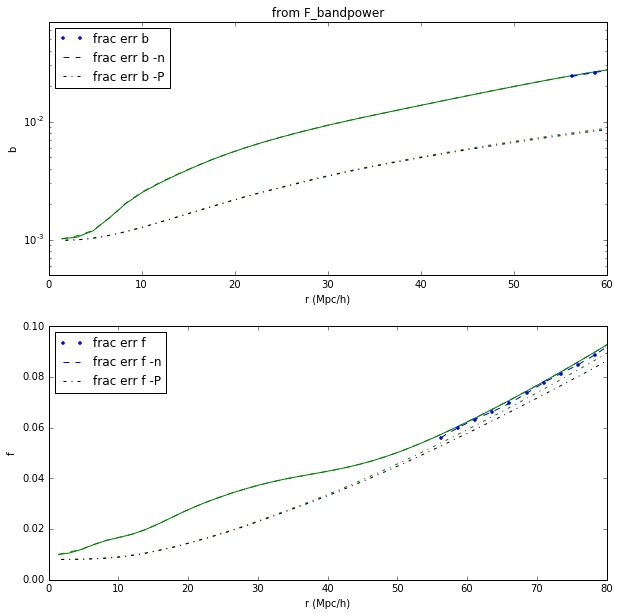

In [321]:
# plotting

# calling full-scale data
# save to txt
DAT = np.loadtxt('data_txt/reid_xi.txt')
DAT2 = np.loadtxt('data_txt/reid_p.txt')
rlist_full, errb_full, errf_full, rlist_full, errbn_full, errfn_full = [DAT[:,i] for i in range(DAT[0,:].size)]
rlistP_full, errPb_full, errPf_full  = [DAT2[:,i] for i in range(DAT2[0,:].size)]

fig, (ax, ax2) = plt.subplots(2,1, figsize=(10, 10))

# full scale

ax.plot(rlist_full, errb_full, 'g-')
ax2.plot(rlist_full, errf_full, 'g-')
ax.plot(rlist_full, errbn_full, color = ax.lines[-1].get_color(), linestyle = '--')
ax2.plot(rlist_full, errfn_full, color = ax.lines[-1].get_color(), linestyle = '--')
ax.plot(rlistP_full, errPb_full, 'g-.')
ax2.plot(rlistP_full, errPf_full, 'g-.')

# limited r and k
ax.plot(rlist, errb,  '.', label = 'frac err b')
ax2.plot(rlist, errf, '.', label = 'frac err f')
ax.plot(rlist, errbn, color = ax.lines[-1].get_color(), linestyle = '--', label = 'frac err b -n')
ax2.plot(rlist, errfn, color = ax.lines[-1].get_color(), linestyle = '--', label = 'frac err f -n')
ax.plot(rlistP, errPb, 'k-.', label = 'frac err b -P')
ax2.plot(rlistP, errPf, 'k-.', label = 'frac err f -P')

ax.set_xlim(0, 60)
ax.set_ylim(0.0005, 0.07)
ax.set_ylabel('b')
ax.set_xlabel('r (Mpc/h)')
ax.set_yscale('log')
ax2.set_xlim(0,80)
ax2.set_ylim(0.00, 0.1)
ax2.set_ylabel('f')
ax2.set_xlabel('r (Mpc/h)')

ax.legend(loc = 'best')
ax2.legend(loc='best')
ax.set_title(' from F_bandpower ')
figname = 'figure/reid.png'
fig.savefig(figname)
print 'fig save to ', figname

In [251]:
RMIN = 0.1
RMAX = 180
KMIN = 0.001
kmin = 0.001
kmax = 2.0
rN = 50
kN_y = 1000
RSDPower_l4 = NoShell_covariance(KMIN, KMAX, RMIN, RMAX, kN, rN, kN_x, kN_y, logscale = False)

[rlist, errb, errf, rlist, errbn, errfn, rlistP, errPb, errPf],_ \
= getbfEllipses(RSDPower_l4, kmin = kmin, kmax=kmax, reid=True, base = 'k')

-------------------------------------------------------------------        
class error_analysis, no RSD         
z = 0.0, kN =1, N_y = 1000, rN = 50, N_x = 8193
dr = 3.67142857143, dk=nan, dk_y=0.002001001001
multiprocessing 100 %reid Xi
reid P


/usr/lib/python2.7/site-packages/ipykernel/__main__.py:207: RuntimeWarning: invalid value encountered in sqrt
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:208: RuntimeWarning: invalid value encountered in sqrt


In [249]:
RSDPower_l5 = NoShell_covariance(KMIN, KMAX, RMIN, RMAX, kN, rN, kN_x, 500, logscale = False)

[rlist2, errb2, errf2, rlist2, errbn2, errfn2, rlistP, errPb, errPf],_ \
= getbfEllipses(RSDPower_l5, kmin = kmin, kmax=kmax, reid=True, base = 'k')

-------------------------------------------------------------------        
class error_analysis, no RSD         
z = 0.0, kN =1, N_y = 200, rN = 50, N_x = 8193
dr = 3.67142857143, dk=nan, dk_y=0.0100452261307
multiprocessing 100 %reid Xi
reid P
-------------------------------------------------------------------        
class error_analysis, no RSD         
z = 0.0, kN =1, N_y = 500, rN = 50, N_x = 8193
dr = 3.67142857143, dk=nan, dk_y=0.00400601202405
multiprocessing 100 %reid Xi
reid P


In [234]:
#DAT = np.column_stack((rlistP, errPb, errPf)) 
#np.savetxt('data_txt/reid_p_k.txt', DAT)

fig save to  figure/reid_k.png


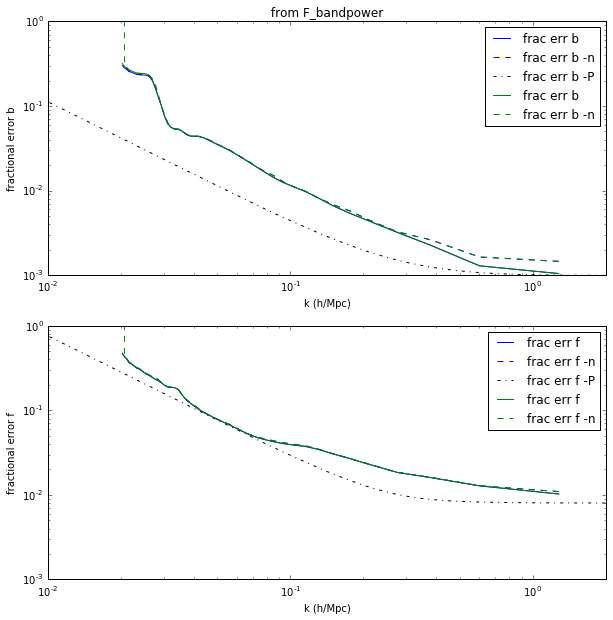

In [252]:
# plotting

# calling full-scale data
# save to txt
DAT = np.loadtxt('data_txt/reid_xi.txt')
DAT2 = np.loadtxt('data_txt/reid_p.txt')
rlist_full, errb_full, errf_full, rlist_full, errbn_full, errfn_full = [DAT[:,i] for i in range(DAT[0,:].size)]
rlistP_full, errPb_full, errPf_full  = [DAT2[:,i] for i in range(DAT2[0,:].size)]

fig, (ax, ax2) = plt.subplots(2,1, figsize=(10, 10))

# full scale

"""
ax.plot(rlist_full, errb_full, 'g-')
ax2.plot(rlist_full, errf_full, 'g-')
ax.plot(rlist_full, errbn_full, color = ax.lines[-1].get_color(), linestyle = '--')
ax2.plot(rlist_full, errfn_full, color = ax.lines[-1].get_color(), linestyle = '--')
ax.plot(rlistP_full, errPb_full, 'g-.')
ax2.plot(rlistP_full, errPf_full, 'g-.')
"""

# limited r and k
ax.plot(rlist, errb, label = 'frac err b')
ax2.plot(rlist, errf, label = 'frac err f')
ax.plot(rlist, errbn, color = ax.lines[-1].get_color(), linestyle = '--', label = 'frac err b -n')
ax2.plot(rlist, errfn, color = ax.lines[-1].get_color(), linestyle = '--', label = 'frac err f -n')
ax.plot(rlistP, errPb, 'k-.', label = 'frac err b -P')
ax2.plot(rlistP, errPf, 'k-.', label = 'frac err f -P')

ax.plot(rlist2, errb2, 'g-', label = 'frac err b')
ax2.plot(rlist2, errf2, 'g-', label = 'frac err f')
ax.plot(rlist2, errbn2, color = ax.lines[-1].get_color(), linestyle = '--', label = 'frac err b -n')
ax2.plot(rlist2, errfn2, color = ax.lines[-1].get_color(), linestyle = '--', label = 'frac err f -n')

ax.set_xlim(0.01, 2)
ax.set_ylim(0.001, 1)
ax.set_ylabel('fractional error b')
ax.set_xlabel('k (h/Mpc)')
ax.set_yscale('log')
ax.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xlim(0.01, 2)
ax2.set_ylim(0.001, 1)
ax2.set_ylabel('fractional error f')
ax2.set_xlabel('k (h/Mpc)')

ax.legend(loc = 'best')
ax2.legend(loc='best')
ax.set_title(' from F_bandpower ')
figname = 'figure/reid_k.png'
fig.savefig(figname)
print 'fig save to ', figname

fig save to : figure/ellipse.png


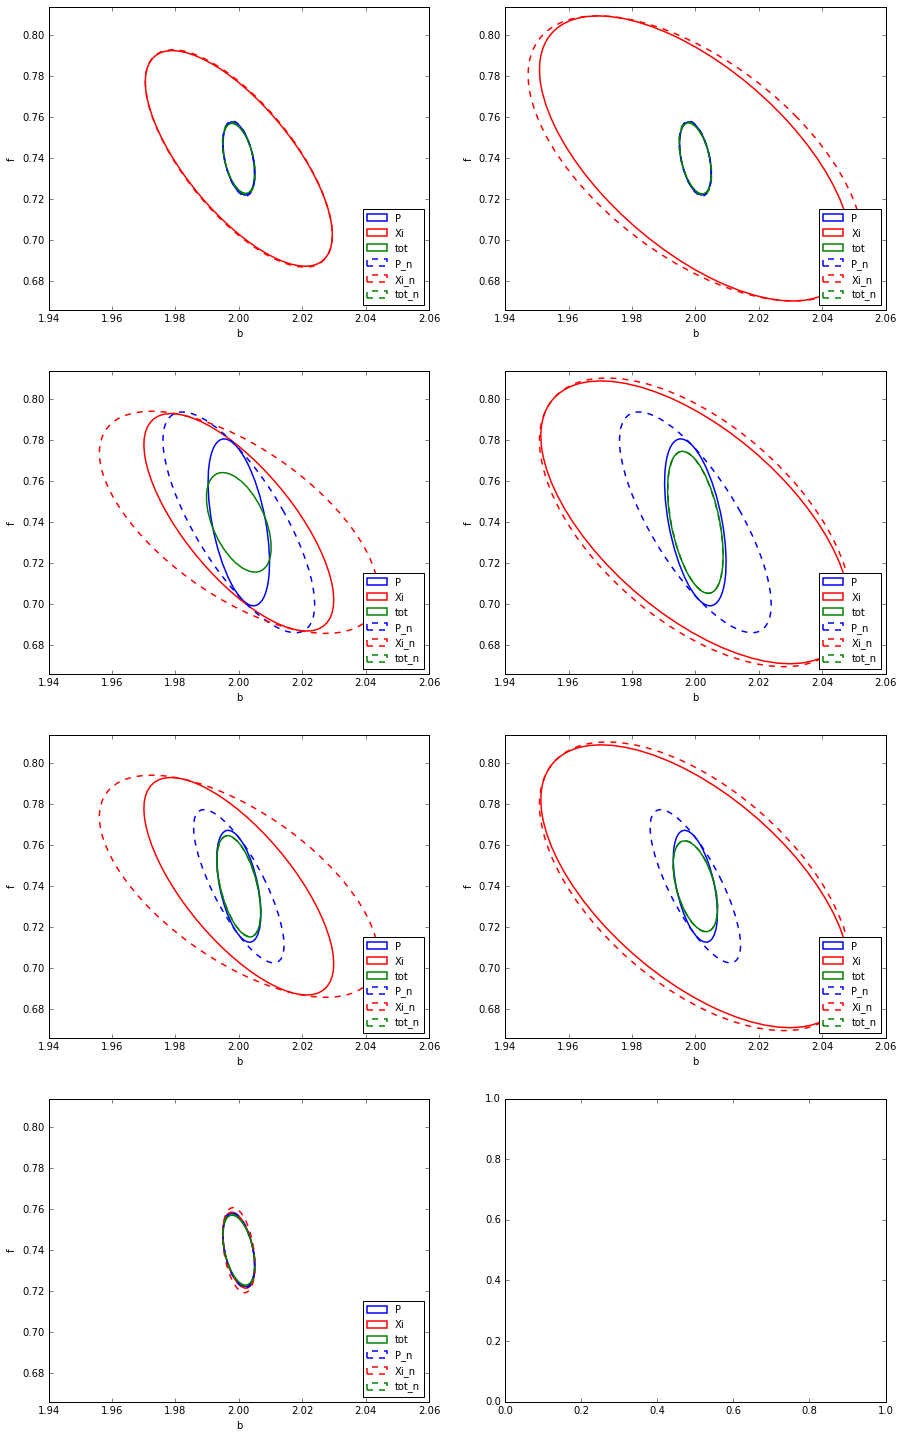

In [295]:
el_list = []
#elllist = confidence_ellipse(RSDPower_l.b, RSDPower_l.f, Cov_PP, Cov_Xi, Cov_tot, Cov_PP_N, Cov_Xi_N, Cov_tot_N)
el = confidence_ellipse(RSDPower_l.b, RSDPower_l.f, Cov_PP, Cov_Xi, Cov_tot, Cov_PP_N, Cov_Xi_N, Cov_tot_N)
el_list.append(el)
el2 = confidence_ellipse(RSDPower_l.b, RSDPower_l.f, Cov_PP2, Cov_Xi2, Cov_tot2, Cov_PP_N2, Cov_Xi_N2, Cov_tot_N2)
el_list.append(el2)
el3 = confidence_ellipse(RSDPower_l.b, RSDPower_l.f, Cov_PP3, Cov_Xi3, Cov_tot3, Cov_PP_N3, Cov_Xi_N3, Cov_tot_N3)
el_list.append(el3)
el4 = confidence_ellipse(RSDPower_l.b, RSDPower_l.f, Cov_PP4, Cov_Xi4, Cov_tot4, Cov_PP_N4, Cov_Xi_N4, Cov_tot_N4)
el_list.append(el4)

el3 = confidence_ellipse(RSDPower_l.b, RSDPower_l.f, Cov_PP3_1, Cov_Xi3_1, Cov_tot3_1, Cov_PP_N3_1, Cov_Xi_N3_1, Cov_tot_N3_1)
el_list.append(el3)
el4 = confidence_ellipse(RSDPower_l.b, RSDPower_l.f, Cov_PP4_1, Cov_Xi4_1, Cov_tot4_1, Cov_PP_N4_1, Cov_Xi_N4_1, Cov_tot_N4_1)
el_list.append(el4)

el5 = confidence_ellipse(RSDPower_l.b, RSDPower_l.f, Cov_PP5, Cov_Xi5, Cov_tot5, Cov_PP_N5, Cov_Xi_N5, Cov_tot_N5)
el_list.append(el5)

fig, ax = plt.subplots(4,2, figsize=(15, 25))
ax = ax.ravel()

for i in range(len(el_list)):
    for e in el_list[i]:
        ax[i].add_artist(e)
        #e.set_alpha(0.2)
        e.set_clip_box(ax[i].bbox)

    xmin = RSDPower_l.b*0.97
    xmax = RSDPower_l.b*1.03
    ymin = RSDPower_l.f*0.90
    ymax = RSDPower_l.f*1.1

    ax[i].set_xlim(xmin, xmax)
    ax[i].set_ylim(ymin, ymax)
    ax[i].set_xlabel('b')
    ax[i].set_ylabel('f')
    labellist = ['P', 'Xi', 'tot', 'P_n', 'Xi_n', 'tot_n']
    ax[i].legend(el_list[i], labellist, loc=4, prop={'size':10})
    #ax.set_title( 'error ellipse of b and f, s marginalized, RSD scale ( r24-152, k0.01-0.2 )' )
    #ax.set_title( 'error ellipse of b and f, s marginalized, BAO scale ( r29-200, k0.02-0.3 )' )
    #ax[i].set_title( 'error ellipse of b and f, s marginalized, ( r {:>0.2f}-{:>0.2f}, k {:>0.2f}-{:>0.2f} )'\
    #             .format(RMIN, RMAX, KMIN, KMAX) )
figname = 'figure/ellipse.png'
fig.savefig(figname)
print 'fig save to :', figname
    

fig save to : figure/ellipse.png


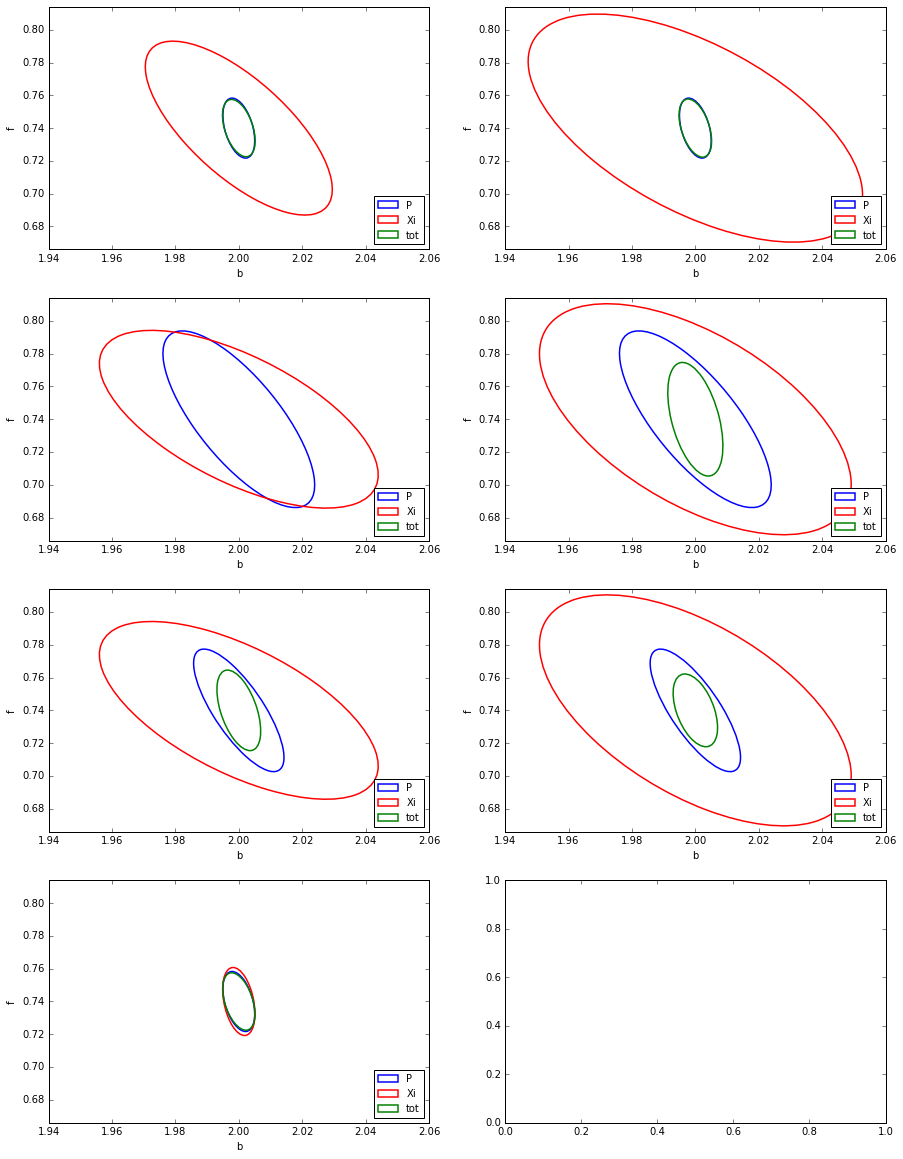

In [296]:
el_list2 = []
b = 2.0
f = 0.74

el = confidence_ellipse(b,f, Cov_PP_N, Cov_Xi_N, Cov_tot_N)
el_list2.append(el)
el2 = confidence_ellipse(b,f, Cov_PP_N2, Cov_Xi_N2, Cov_tot_N2)
el_list2.append(el2)
el3 = confidence_ellipse(b,f, Cov_PP_N3, Cov_Xi_N3, Cov_tot_N3)
el_list2.append(el3)
el4 = confidence_ellipse(b,f, Cov_PP_N4, Cov_Xi_N4, Cov_tot_N4)
el_list2.append(el4)
el3 = confidence_ellipse(b,f, Cov_PP_N3_1, Cov_Xi_N3_1, Cov_tot_N3_1)
el_list2.append(el3)
el4 = confidence_ellipse(b,f, Cov_PP_N4_1, Cov_Xi_N4_1, Cov_tot_N4_1)
el_list2.append(el4)
el5 = confidence_ellipse(b,f, Cov_PP_N5, Cov_Xi_N5, Cov_tot_N5)
el_list2.append(el5)

fig, ax = plt.subplots(4,2, figsize=(15, 20))
ax = ax.ravel()

for i in range(len(el_list2)):
    for e in el_list2[i]:
        ax[i].add_artist(e)
        #e.set_alpha(0.2)
        e.set_clip_box(ax[i].bbox)

    xmin = RSDPower_l.b*0.97
    xmax = RSDPower_l.b*1.03
    ymin = RSDPower_l.f*0.9
    ymax = RSDPower_l.f*1.1

    ax[i].set_xlim(xmin, xmax)
    ax[i].set_ylim(ymin, ymax)
    ax[i].set_xlabel('b')
    ax[i].set_ylabel('f')
    labellist = ['P', 'Xi', 'tot', 'P_n', 'Xi_n', 'tot_n']
    ax[i].legend(el_list2[i], labellist, loc=4, prop={'size':10})

figname = 'figure/ellipse.png'
fig.savefig(figname)
print 'fig save to :', figname
    

## Various ranges

In [297]:
#  (parameter description in class code)
# Fourier K 0.001~10
KMIN = 0.005
KMAX = 2 # 361.32 #502.32
RMIN = 0.1
RMAX = 180

kmin = 0.01
kmax = 0.2

# the number of k sample point should be 2^n+1 (b/c romb integration)
rN = 50
kN = 1
kN_x = 2**13 + 1
kN_y = 500
#subN = 2**5 + 1
# RSD class

In [335]:
RMIN = 24
RMAX = 152
rN = int((RMAX - RMIN) * 60./180)
Samushia = NoShell_covariance(KMIN, KMAX, 24, 152, kN, rN, kN_x, kN_y, logscale = False)
[rlist_S, errb_S, errf_S, rlist_S, errbn_S, errfn_S, rlistP_S, errPb_S, errPf_S], \
[Cov_PP_S, Cov_Xi_S, Cov_tot_S, Cov_PP_N_S, Cov_Xi_N_S, Cov_tot_N_S] \
= getbfEllipses(Samushia, kmin = kmin, kmax=kmax, reid = True)
[Cov_PP_S2, Cov_Xi_S2, Cov_tot_S2, Cov_PP_N_S2, Cov_Xi_N_S2, Cov_tot_N_S2] = getbfEllipses(Samushia, kmin = 0.02, kmax=0.3)

-------------------------------------------------------------------        
class error_analysis, no RSD         
z = 0.0, kN =1, N_y = 500, rN = 42, N_x = 8193
dr = 3.12195121951, dk=nan, dk_y=0.00399799599198
multiprocessing 100 %reid Xi
reid P
multiprocessing 100 %

In [420]:
RMIN = 55
RMAX = 200
rN = int((RMAX - RMIN) * 60./180)
Chuang = NoShell_covariance(KMIN, KMAX, RMIN, RMAX, kN, rN, kN_x, kN_y, logscale = False)
[rlist, errb, errf, rlist, errbn, errfn, rlistP, errPb, errPf],\
[Cov_PP_C, Cov_Xi_C, Cov_tot_C, Cov_PP_N_C, Cov_Xi_N_C, Cov_tot_N_C]\
= getbfEllipses(Chuang, kmin = kmin, kmax=kmax, reid = True)
[Cov_PP_C2, Cov_Xi_C2, Cov_tot_C2, Cov_PP_N_C2, Cov_Xi_N_C2, Cov_tot_N_C2] = getbfEllipses(Chuang, kmin = 0.02, kmax=0.3)

-------------------------------------------------------------------        
class error_analysis, no RSD         
z = 0.0, kN =1, N_y = 500, rN = 48, N_x = 8193
dr = 3.08510638298, dk=nan, dk_y=0.00399799599198
multiprocessing 100 %reid Xi
reid P
multiprocessing 100 %

In [426]:
RMIN = 40
RMAX = 160
rN = int((RMAX - RMIN) * 60./180)
Sanchez = NoShell_covariance(KMIN, KMAX, RMIN, RMAX, kN, rN, kN_x, 500, logscale = False)
[rlist, errb, errf, rlist, errbn, errfn, rlistP, errPb, errPf], \
[Cov_PP_San, Cov_Xi_San, Cov_tot_San, Cov_PP_N_San, Cov_Xi_N_San, Cov_tot_N_San]\
= getbfEllipses(Sanchez, kmin = kmin, kmax=kmax, reid = True)
[Cov_PP_San2, Cov_Xi_San2, Cov_tot_San2, Cov_PP_N_San2, Cov_Xi_N_San2, Cov_tot_N_San2] = getbfEllipses(Sanchez, kmin = 0.02, kmax=0.3)

-------------------------------------------------------------------        
class error_analysis, no RSD         
z = 0.0, kN =1, N_y = 500, rN = 40, N_x = 8193
dr = 3.07692307692, dk=nan, dk_y=0.00399799599198
multiprocessing 100 %reid Xi
reid P
multiprocessing 100 %

In [330]:
RMIN = 10
RMAX = 180
rN = int((RMAX - RMIN) * 60./180)
WiggleZ = NoShell_covariance(KMIN, KMAX, 10, 180, kN, rN, kN_x, kN_y, logscale = False)
#[rlist, errb, errf, rlist, errbn, errfn, rlistP, errPb, errPf], [Cov_PP, Cov_Xi, Cov_tot, Cov_PP_N, Cov_Xi_N, Cov_tot_N]\
#= getbfEllipses(RSDPower_l, kmin = kmin, kmax=kmax, reid = True)
[Cov_PP_W, Cov_Xi_W, Cov_tot_W, Cov_PP_N_W, Cov_Xi_N_W, Cov_tot_N_W] = getbfEllipses(WiggleZ, kmin = kmin, kmax=kmax)
[Cov_PP_W2, Cov_Xi_W2, Cov_tot_W2, Cov_PP_N_W2, Cov_Xi_N_W2, Cov_tot_N_W2] = getbfEllipses(WiggleZ, kmin = 0.02, kmax=0.3)


-------------------------------------------------------------------        
class error_analysis, no RSD         
z = 0.0, kN =1, N_y = 500, rN = 56, N_x = 8193
dr = 3.09090909091, dk=nan, dk_y=0.00399799599198
multiprocessing 100 %

fig save to : figure/ellipse_v.png


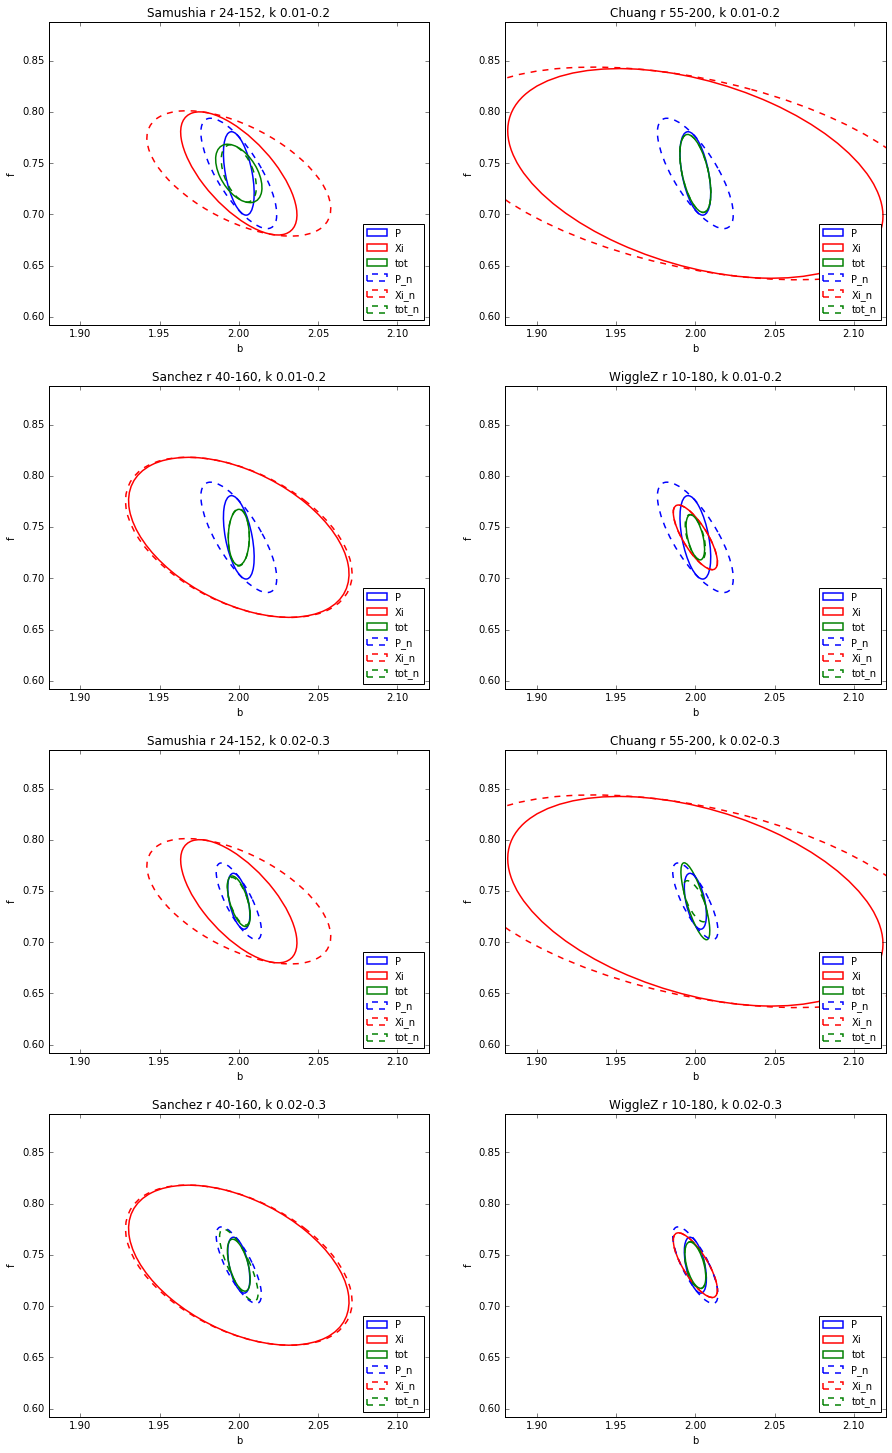

In [430]:
el_list_2 = []
el_title = ['Samushia r 24-152, k 0.01-0.2', 'Chuang r 55-200, k 0.01-0.2', 'Sanchez r 40-160, k 0.01-0.2', 'WiggleZ r 10-180, k 0.01-0.2'] \
+ ['Samushia r 24-152, k 0.02-0.3', 'Chuang r 55-200, k 0.02-0.3', 'Sanchez r 40-160, k 0.02-0.3', 'WiggleZ r 10-180, k 0.02-0.3'] 
#elllist = confidence_ellipse(RSDPower_l.b, RSDPower_l.f, Cov_PP, Cov_Xi, Cov_tot, Cov_PP_N, Cov_Xi_N, Cov_tot_N)
el = confidence_ellipse(Samushia.b, Samushia.f, Cov_PP_S, Cov_Xi_S, Cov_tot_S, Cov_PP_N_S, Cov_Xi_N_S, Cov_tot_N_S)
el_list_2.append(el)
el2 = confidence_ellipse(Chuang.b, Chuang.f, Cov_PP_C, Cov_Xi_C, Cov_tot_C, Cov_PP_N_C, Cov_Xi_N_C, Cov_tot_N_C)
el_list_2.append(el2)
el3 = confidence_ellipse(Sanchez.b, Sanchez.f, Cov_PP_San, Cov_Xi_San, Cov_tot_San, Cov_PP_N_San, Cov_Xi_N_San, Cov_tot_N_San)
el_list_2.append(el3)
el4 = confidence_ellipse(WiggleZ.b, WiggleZ.f, Cov_PP_W, Cov_Xi_W, Cov_tot_W, Cov_PP_N_W, Cov_Xi_N_W, Cov_tot_N_W)
el_list_2.append(el4)

el5 = confidence_ellipse(Samushia.b, Samushia.f, Cov_PP_S2, Cov_Xi_S2, Cov_tot_S2, Cov_PP_N_S2, Cov_Xi_N_S2, Cov_tot_N_S2)
el_list_2.append(el5)
el6 = confidence_ellipse(Chuang.b, Chuang.f, Cov_PP_C2, Cov_Xi_C2, Cov_tot_C2, Cov_PP_N_C2, Cov_Xi_N_C2, Cov_tot_N_C2)
el_list_2.append(el6)
el7 = confidence_ellipse(Sanchez.b, Sanchez.f, Cov_PP_San2, Cov_Xi_San2, Cov_tot_San2, Cov_PP_N_San2, Cov_Xi_N_San2, Cov_tot_N_San2)
el_list_2.append(el7)
el8 = confidence_ellipse(WiggleZ.b, WiggleZ.f, Cov_PP_W2, Cov_Xi_W2, Cov_tot_W2, Cov_PP_N_W2, Cov_Xi_N_W2, Cov_tot_N_W2)
el_list_2.append(el8)


fig, ax = plt.subplots(4,2, figsize=(15, 25))
ax = ax.ravel()

for i in range(len(el_list_2)):
    for e in el_list_2[i]:
        ax[i].add_artist(e)
        #e.set_alpha(0.2)
        e.set_clip_box(ax[i].bbox)

    xmin = Samushia.b*0.94
    xmax = Samushia.b*1.06
    ymin = Samushia.f*0.8
    ymax = Samushia.f*1.2

    ax[i].set_xlim(xmin, xmax)
    ax[i].set_ylim(ymin, ymax)
    ax[i].set_xlabel('b')
    ax[i].set_ylabel('f')
    ax[i].set_title(el_title[i])
    labellist = ['P', 'Xi', 'tot', 'P_n', 'Xi_n', 'tot_n']
    ax[i].legend(el_list_2[i], labellist, loc=4, prop={'size':10})
    #ax.set_title( 'error ellipse of b and f, s marginalized, RSD scale ( r24-152, k0.01-0.2 )' )
    #ax.set_title( 'error ellipse of b and f, s marginalized, BAO scale ( r29-200, k0.02-0.3 )' )
    #ax[i].set_title( 'error ellipse of b and f, s marginalized, ( r {:>0.2f}-{:>0.2f}, k {:>0.2f}-{:>0.2f} )'\
    #             .format(RMIN, RMAX, KMIN, KMAX) )
figname = 'figure/ellipse_v.png'
fig.savefig(figname)
print 'fig save to :', figname
    

fig save to : figure/ellipse_tot.png


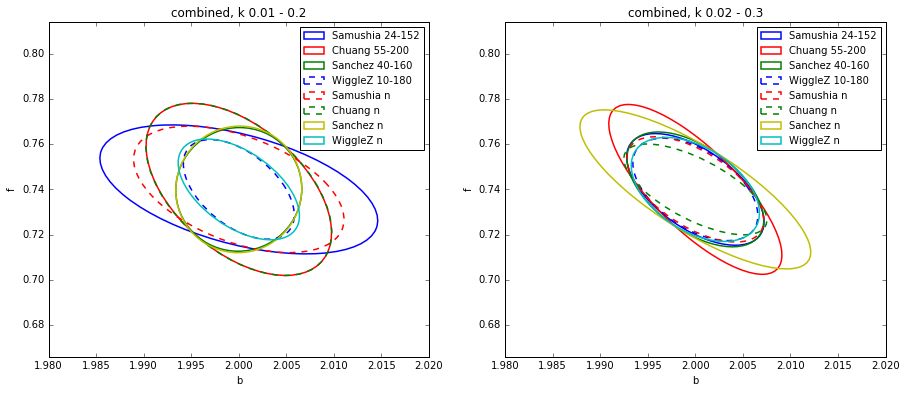

In [436]:
from noshellavg import confidence_ellipse

el_list_3 = []
el_title = ['Samushia 24-152', 'Chuang 55-200', 'Sanchez 40-160', 'WiggleZ 10-180',
            'Samushia n', 'Chuang n', 'Sanchez n', 'WiggleZ n']

el = confidence_ellipse(Samushia.b, Samushia.f, Cov_tot_S, Cov_tot_C, Cov_tot_San, Cov_tot_W,\
                        Cov_tot_N_S, Cov_tot_N_C, Cov_tot_N_San, Cov_tot_N_W)
el2 = confidence_ellipse(Samushia.b, Samushia.f, Cov_tot_S2, Cov_tot_C2, Cov_tot_San2, Cov_tot_W2,\
                         Cov_tot_N_S2, Cov_tot_N_C2, Cov_tot_N_San2, Cov_tot_N_W2)

el_list_3.append(el)
el_list_3.append(el2)


fig, ax = plt.subplots(1,2, figsize=(15, 6))
ax = ax.ravel()

for i in range(len(el_list_3)):
    for e in el_list_3[i]:
        ax[i].add_artist(e)
        #e.set_alpha(0.2)
        e.set_clip_box(ax[i].bbox)

    xmin = Samushia.b*0.99
    xmax = Samushia.b*1.01
    ymin = Samushia.f*0.9
    ymax = Samushia.f*1.1

    ax[i].set_xlim(xmin, xmax)
    ax[i].set_ylim(ymin, ymax)
    ax[i].set_xlabel('b')
    ax[i].set_ylabel('f')
    
    labellist = el_title
    ax[i].legend(el_list_3[i], labellist, loc='best', prop={'size':10})

ax[0].set_title('combined, k 0.01 - 0.2')
ax[1].set_title('combined, k 0.02 - 0.3')
#ax[1].set_title('tot, n marginalized')
figname = 'figure/ellipse_tot.png'
fig.savefig(figname)
print 'fig save to :', figname